

 ------------------------------------------------------------------------------------
 ------------------------------------DELTA MODEL-------------------------------------
 ------------------------------------------------------------------------------------


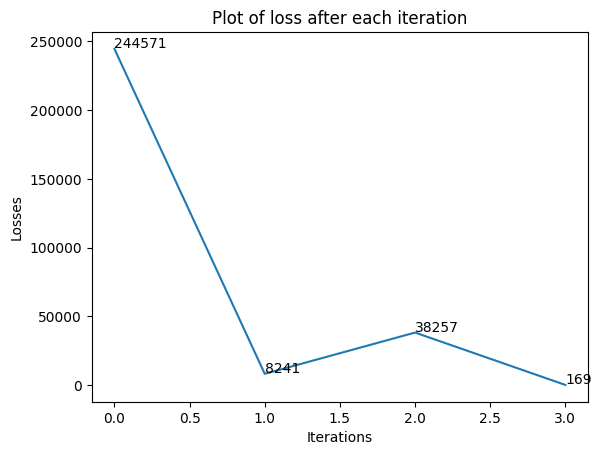


 ---------------------
 Final weight and bias: tensor([134,  50, 113]) tensor([0.6118])

 ---------------------
 Testing losses:
price tensor([1193.6118])
Loss:  tensor([1589.8136])
price tensor([481.6118])
Loss:  tensor([169.0632])
price tensor([786.6118])
Loss:  tensor([2009.0309])
[tensor([1589.8136]), tensor([169.0632]), tensor([2009.0309])]


 ------------------------------------------------------------------------------------
 ---------------------------------BATCH DELTA MODEL----------------------------------
 ------------------------------------------------------------------------------------
Plot of loss after each iteration: [tensor(46633.1055), tensor(19544.8164), tensor(19026.0312), tensor(20015.0332), tensor(20428.6738), tensor(21200.0996), tensor(21381.3691), tensor(21836.4258), tensor(21516.9727), tensor(20220.4258)]


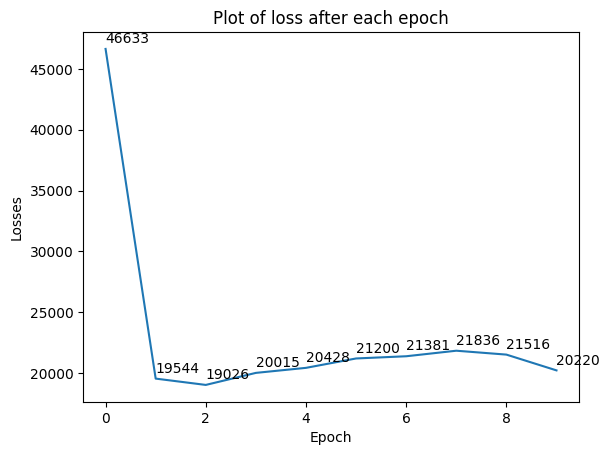


 ---------------------
 Final weight and bias: tensor([112,  82, 126]) tensor([0.7640])

 ---------------------
 Testing losses:
price tensor([1132.7640])
Loss:  tensor([6872.1353])
price tensor([514.7640])
Loss:  tensor([108.9884])
price tensor([858.7640])
Loss:  tensor([38.4042])
[tensor([6872.1353]), tensor([108.9884]), tensor([38.4042])]


In [27]:
from IPython.testing import test
import torch
## It is recommended that using a class to customize the Dataset
## so that you can create an iterable loader by DataLoader.
from torch.utils.data import Dataset, DataLoader
## using matplotlib to plot your losses
import matplotlib.pyplot as plt
from torch import nn
from torch import optim


class train_data(Dataset):
   def __init__(self, train_data, actual_price,lr):
      # Initialize random weights and biases
      self.weight = torch.tensor([50, 50, 50 ])
      self.bias = torch.randn(1)
      self.train = train_data
      self.actual_price = actual_price
      self.lr = lr
      self.len = self.train.shape[0]
   def __len__(self):
    return self.len
   def __getitem__(self, index):
    return self.train[index]


class test_data(Dataset):
   ## your code is here
  def __init__(self):
    self.test = torch.tensor([[6, 1, 3],
                          [2, 2, 1],
                          [4, 5, 0]])
    self.actual_price = torch.tensor([1250, 500, 850])
    self.lr = torch.tensor([1/70, 1/12, 1/27])
    self.len = self.test.shape[0]

  # Define a function test_model that will test the parameters tunned model
  # against the test data, and return the testing losses
  def test_model(self,wt, bias):

    # Initialze array to store losses
    losses = []
    for i in range(self.len):
        price = self.test[i] @ wt.t() + bias
        print('price', price)
        # Measure loss
        loss = ((self.actual_price[i] - price) ** 2)/2
        print('Loss: ',loss)
        losses.append(loss)
    return losses


## In this case you should run delta_rule(model, train_loader) and
## batch_delta_rule(model, train_loader) respectively.
## Applying the above weights updating methods to train
## your model instead of using the training API of pytorch.
## Again, you can complete it in your own way

#-----------------------------------------------------------------------#
#----------------------------DELTA MODEL--------------------------------#
#-----------------------------------------------------------------------#

# DELTA MODEL
def delta_model(x):
    wt = x.weight
    bias = x.bias
    losses = []
    #print('Inintial wts and bias: ',wt,bias)
    # Iterate over all training samples
    for i in range(x.__len__()):
      price = x.train[i] @ wt.t() + bias
      #print('price', price)
      # Measure loss
      loss = ((x.actual_price[i] - price) ** 2)/2

      # Append loss in each iteration to the losses array
      losses.append(loss)

      # Calculate Gradient
      for j in range(len(wt)):
        grad = - x.train[i][j] * (x.actual_price[i] - price)

        # Update weights
        wt[j] = wt[j] - x.lr[i]*grad


    plt.plot(list(range(4)),losses)
    for a,b in zip(list(range(4)),losses):
        plt.text(a, b+500, str(int(b)))
    plt.xlabel("Iterations")
    plt.ylabel("Losses")
    plt.title("Plot of loss after each iteration")
    plt.show()
    # Plot the iterative loss
    return wt,bias

#-----------------------------------------------------------------------#
#---------------------BATCH DELTA MODEL---------------------------------#
#-----------------------------------------------------------------------#

# BATCH DELTA MODEL
def batch_delta_model(x):
  num_epochs = 10
  # Initialize weights and biases
  wt = x.weight
  bias = x.bias
  # Initialze array to store losses after each epoch
  losses = []
  for epoch in range(num_epochs):

    for i in range(x.__len__()):
      price = x.train[i] @ wt.t() + bias

      # Measure loss
      loss = ((x.actual_price[i] - price) ** 2)/2

      # Calculate Gradient
      for j in range(len(wt)):
        grad = - x.train[i][j] * (x.actual_price[i] - price)
        # Get the average of all the gradients in this batch
        avg_grad = torch.sum(grad)/3

        # Update weights
        wt[j] = wt[j] - x.lr*avg_grad

    # Append the average loss after epoch to losses array
    losses.append(torch.sum(loss)/3)

  print('Plot of loss after each iteration:',losses)
  plt.plot(list(range(10)),losses)
  for a,b in zip(list(range(10)),losses):
      plt.text(a, b+500, str(int(b)))
  plt.xlabel("Epoch")
  plt.ylabel("Losses")
  plt.title("Plot of loss after each epoch")
  plt.show()
  return wt,bias


#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# MAIN METHOD
#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#


# Initialize training data for delta rule
delta_train_data =  torch.tensor([[5, 2, 4 ],
                                  [3, 3, 3],
                                  [0, 5, 1],
                                  [2, 1, 2]])
actual_price = torch.tensor([1250, 900, 350, 550])
learning_rt = torch.tensor([1/70, 1/12, 1/27, 1/10])

# Initialize training data for batch delta rule
batch_delta_train_data =  torch.tensor([[[5, 2, 4 ], [3, 3, 3],  [0, 5, 1]],
                                        [[2, 1, 2 ], [1, 0, 5],  [4, 2, 1]],
                                        [[6, 1, 1], [2, 3, 4],  [7, 3, 0]],
                                        [[4, 2, 2 ], [1, 5, 7],  [5, 1, 3]],
                                        ])
batch_actual_price = torch.tensor([[1250, 900, 350],
                                  [550, 650, 800],
                                  [1050, 850, 1200],
                                  [1000, 1100, 1100]])
batch_learning_rt = torch.tensor([1/100])


print('\n\n ------------------------------------------------------------------------------------')
print(' ------------------------------------DELTA MODEL-------------------------------------')
print(' ------------------------------------------------------------------------------------')

# Create instance of delta model and train it
delta_obj = train_data(delta_train_data,actual_price, learning_rt)
weight, bias = delta_model(delta_obj)
print('\n ---------------------\n Final weight and bias:', weight, bias)

test_obj = test_data()
print('\n ---------------------\n Testing losses:')
print(test_obj.test_model(weight, bias))

print('\n\n ------------------------------------------------------------------------------------')
print(' ---------------------------------BATCH DELTA MODEL----------------------------------')
print(' ------------------------------------------------------------------------------------')

# Create instance of batch delta model and train it
batch_delta_obj = train_data(batch_delta_train_data, batch_actual_price,batch_learning_rt)
weight, bias = batch_delta_model(batch_delta_obj)
print('\n ---------------------\n Final weight and bias:', weight, bias)
#delta_rule()

test_obj = test_data()
print('\n ---------------------\n Testing losses:')
print(test_obj.test_model(weight, bias))


### CHANGES TO THE PROVIDED CODE

1. passed tuned weights and biases instead of your_model in methods of testing class






#### DOUBTS

1. The plot is for testing loss? or loss during training?

2. **In batch rule**- I have 3 training data in each batch. I have calculated the gradient vector which is a 1 by 3 vector, for the first training data.  How do I update the weights now? I have 3 weights, i.e., for each input neuron. Do I iterate over each individual data point in the batch and update the weight? or do I take avg of the gradient and update the weight once for each batch?

# ADD THE FOLLOWING CODE CHANGES LATER:

1. Move hardcode initialization from __init__ to object creation call.

2. In batch_delta_rule, move num_epoch initialization to __init__

3. In batch_delta_rule, while averaging the loss, remove hardcoded value of batch size, and instead define it in __len__ or something